In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_mat = pd.read_csv('student-mat.csv',sep = ';')

In [3]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df_mat.drop('school',axis = 1, inplace = True)

In [5]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    object
 15  famsup      395 non-null    object
 16  paid        395 non-null    object
 17  activities  395 non-null    object
 18  nursery     395 non-null    object
 19  higher      395 non-null    object
 20  internet  

In [6]:
df_mat.shape

(395, 32)

In [7]:
df_mat.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10


In [8]:
# our dataset has some Non categorical Values let's change it:
#  categorize age into 3 classes:
def age(age):
    new_age=[]
    for i in age:
        if(i < 17):
            i=0
        elif (i < 19):
            i=1
        else:
            i=2
        new_age.append(i)
    return new_age

df_mat['age']=age(df_mat['age'])
df_mat.head()



,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,1,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,1,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,0,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,0,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,0,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10


<AxesSubplot:xlabel='age', ylabel='G3'>

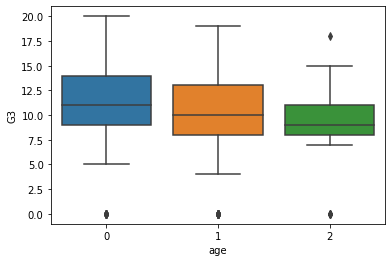

In [9]:
sns.boxplot(x='age',y='G3',data=df_mat)

Students of Age Less than 17 has higher median of scoring whereas students of age> 19 has lowest mean.

In [10]:
# comparing Performance of male and female students 
df_mat['sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0      F
1      F
2      F
3      F
4      F
      ..
390    M
391    M
392    M
393    M
394    M
Name: sex, Length: 395, dtype: object>

<AxesSubplot:xlabel='sex', ylabel='G3'>

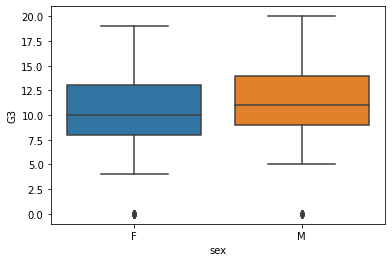

In [11]:
sns.boxplot(x ='sex', y ='G3', data = df_mat)

Male students have better performance in school than the female students. Since the median score of boys is more than girls and the maximum marks also

In [12]:
df_mat['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

<AxesSubplot:xlabel='address', ylabel='G3'>

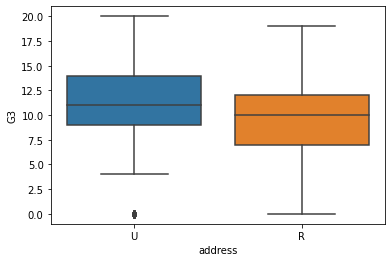

In [13]:
sns.boxplot('address','G3',data=df_mat)

Students living in Urban Areas has better performance than students coming from Rural Areas.


In [14]:
df_mat['famsize'].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

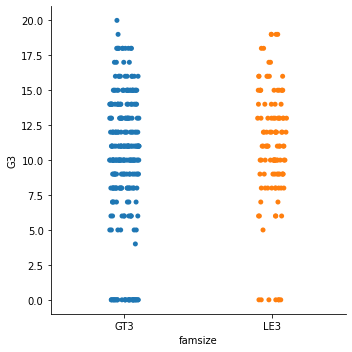

In [15]:
sns.catplot(x="famsize", y="G3", data=df_mat)

<AxesSubplot:xlabel='famsize', ylabel='G3'>

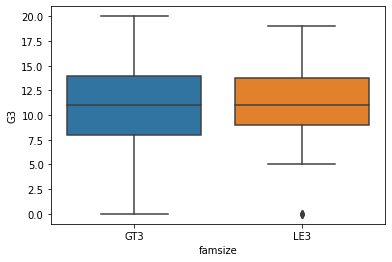

In [16]:
sns.boxplot(x = 'famsize', y = 'G3', data = df_mat)

In [17]:
df_mat.drop('famsize', axis = 1)

,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,1,U,A,4,4,at_home,teacher,course,mother,...,4,3,4,1,1,3,6,5,6,6
1,F,1,U,T,1,1,at_home,other,course,father,...,5,3,3,1,1,3,4,5,5,6
2,F,0,U,T,1,1,at_home,other,other,mother,...,4,3,2,2,3,3,10,7,8,10
3,F,0,U,T,4,2,health,services,home,mother,...,3,2,2,1,1,5,2,15,14,15
4,F,0,U,T,3,3,other,other,home,father,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,2,U,A,2,2,services,services,course,other,...,5,5,4,4,5,4,11,9,9,9
391,M,1,U,T,3,1,services,services,course,mother,...,2,4,5,3,4,2,3,14,16,16
392,M,2,R,T,1,1,other,other,course,other,...,5,5,3,3,3,3,3,10,8,7
393,M,1,R,T,3,2,services,other,course,mother,...,4,4,1,3,4,5,0,11,12,10


In [18]:
df_mat['Pstatus'].value_counts()

T    354
A     41
Name: Pstatus, dtype: int64

<AxesSubplot:xlabel='Pstatus', ylabel='G3'>

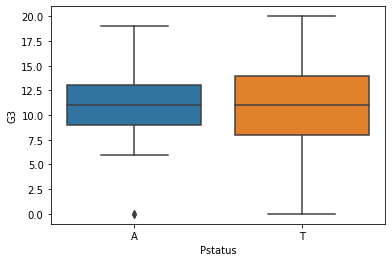

In [19]:
sns.boxplot("Pstatus","G3", data = df_mat)

Students whose parents lived togethar tend to perfor better

<AxesSubplot:xlabel='Medu', ylabel='G3'>

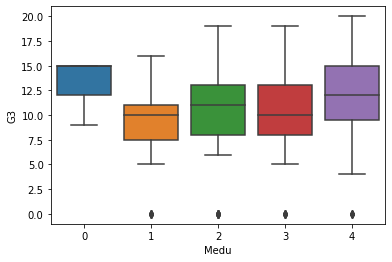

In [20]:
sns.boxplot(x='Medu',y='G3',data=df_mat)

Students whose mother has been more educated tend to perform better

In [21]:
df_mat['Fedu'].value_counts()

2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64

<AxesSubplot:xlabel='Fedu', ylabel='G3'>

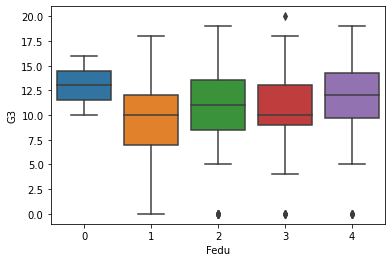

In [22]:
sns.boxplot(x='Fedu',y='G3',data=df_mat)

Students whose fathers have completed higher education have slightly better chance of performing well in exams.

In [23]:
def absences(n):
    new=[]
    for i in n:    
        if (i <= 10):
            i=0
        elif(i <= 20):
            i=1
        else:
            i=2
        new.append(i)
    return new
df_mat['absences']=absences(df_mat['absences'])

<AxesSubplot:xlabel='absences', ylabel='G3'>

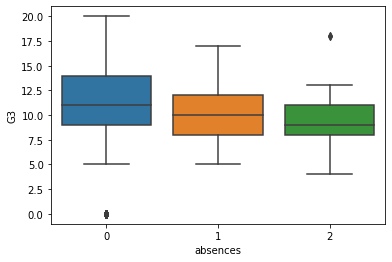

In [24]:
sns.boxplot("absences","G3", data = df_mat)

Students who has lower absents tends to perform better


In [25]:
df_mat.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,1,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,0,5,6,6
1,F,1,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,0,5,5,6
2,F,0,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,0,7,8,10
3,F,0,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,0,15,14,15
4,F,0,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,0,6,10,10


In [26]:

# converting string values into categorical values:
df_mat['sex'] = df_mat['sex'].map({'M': 0, 'F': 1})
df_mat['address'] = df_mat['address'].map({'U': 0, 'R': 1})
df_mat['internet'] = df_mat['internet'].map({'yes': 0, 'no': 1})
df_mat['famsize'] = df_mat['famsize'].map({'LE3':0, 'GT3': 1})
df_mat['Pstatus'] = df_mat['Pstatus'].map({'A':0, 'T':'1'})
df_mat['Mjob'] = df_mat['Mjob'].map({'at_home':0, 'health':1, 'teacher':2,'services':3,'other':4})
df_mat['Fjob'] = df_mat['Fjob'].map({'at_home':0, 'health':1, 'teacher':2,'services':3,'other':4})
df_mat['reason'] = df_mat['reason'].map({'reputation':0, 'course':1,'home':2,'other':3})
df_mat['guardian'] = df_mat['guardian'].map({'father':0, 'mother':1,'other':2})

d= {'yes':0, 'no':1}
df_mat['schoolsup'] = df_mat['schoolsup'].map(d)
df_mat['famsup'] = df_mat['famsup'].map(d)
df_mat['paid'] = df_mat['paid'].map(d)
df_mat['activities'] = df_mat['activities'].map(d)
df_mat['nursery'] = df_mat['nursery'].map(d)
df_mat['higher'] = df_mat['higher'].map(d)
df_mat['romantic'] = df_mat['romantic'].map(d)
df_mat.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,0,1,0,4,4,0,2,1,...,4,3,4,1,1,3,0,5,6,6
1,1,1,0,1,1,1,1,0,4,1,...,5,3,3,1,1,3,0,5,5,6
2,1,0,0,0,1,1,1,0,4,3,...,4,3,2,2,3,3,0,7,8,10
3,1,0,0,1,1,4,2,1,3,2,...,3,2,2,1,1,5,0,15,14,15
4,1,0,0,1,1,3,3,4,4,2,...,4,3,2,1,2,5,0,6,10,10


In [27]:
df = df_mat.copy(deep = True)

In [28]:
def change(df):
    new_G3 = []
    for i in df:
        if(i > 9):
            i = 1
        else:
            i = 0
        new_G3.append(i)
    return new_G3
df_mat['G3'] = change(df_mat['G3'])

In [29]:
pd.isnull(df_mat).sum() 
df_mat.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,0,1,0,4,4,0,2,1,...,4,3,4,1,1,3,0,5,6,0
1,1,1,0,1,1,1,1,0,4,1,...,5,3,3,1,1,3,0,5,5,0
2,1,0,0,0,1,1,1,0,4,3,...,4,3,2,2,3,3,0,7,8,1
3,1,0,0,1,1,4,2,1,3,2,...,3,2,2,1,1,5,0,15,14,1
4,1,0,0,1,1,3,3,4,4,2,...,4,3,2,1,2,5,0,6,10,1


In [30]:
# features selection using chi square:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = df_mat.iloc[:,0:31]
y = df_mat.iloc[:,-1]

In [31]:
# select k best features:
best = SelectKBest(score_func = chi2, k = 10)
fit = best.fit(x,y);

In [32]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns  = pd.DataFrame(x.columns)


In [33]:
featurescores = pd.concat([dfcolumns,dfscores], axis  = 1)
featurescores.columns = ['specs','scores']
featurescores

,specs,scores
0,sex,0.932542
1,age,7.363357
2,address,0.839169
3,famsize,0.199588
4,Pstatus,0.079557
5,Medu,2.286991
6,Fedu,2.160517
7,Mjob,0.236990
8,Fjob,0.064922
9,reason,0.000002


In [34]:
# selecting top 10 best features:  --> which can determine how much impact it have on Result--> The more the value more the impact
print(featurescores.nlargest(10,'scores'))

       specs      scores
30        G2  273.800569
29        G1  175.953380
13  failures   74.370431
19    higher    9.326887
1        age    7.363357
28  absences    7.192532
24     goout    5.283173
5       Medu    2.286991
6       Fedu    2.160517
16      paid    1.554227


In [35]:
import seaborn as sns

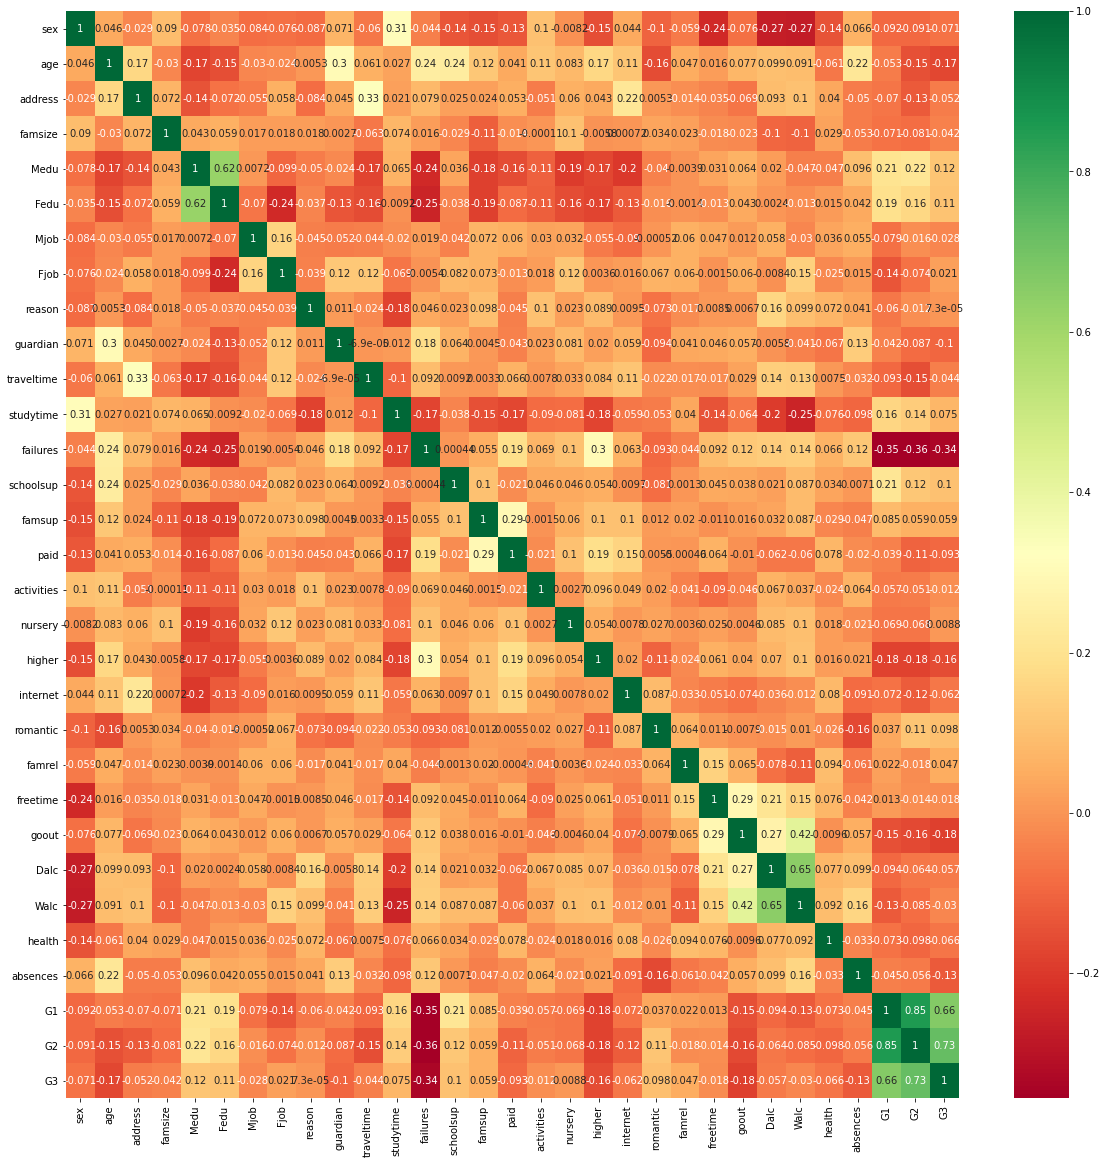

In [36]:
# feature selection using Correlation matrix:

cormat = df_mat.corr()
top_corr_features = cormat.index
plt.figure(figsize = (20,20))

#plot heat map
g = sns.heatmap(df_mat[top_corr_features].corr(),annot = True,cmap = 'RdYlGn')

### as we didn't find any Attributes which are totally not correlated with our Target so we decided not to drop any of the atttributes:

In [37]:
# applied KNN ALgorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pickle

X = df_mat.iloc[:, 0:31]
y = df_mat['G3']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state = 42)

knn = KNeighborsClassifier(n_neighbors = 5)
 
knn.fit(X_train, y_train)
 
# Predict on dataset which model has not seen before
knn.score(X_test,y_test)


0.907563025210084

In [38]:
# applying Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)
model = LogisticRegression(max_iter=1000)

model1 = model.fit(X_train,y_train)
pickle.dump(model1,open('model_1.pkl','wb'))
prediction1 = model1.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction1)
cm

array([[43,  3],
       [ 4, 69]], dtype=int64)

In [40]:
from sklearn import metrics
metrics.accuracy_score(prediction1,y_test)

0.9411764705882353

### Now what if G1 and G2 are not present in the Data. then How is our model is going to predict:

In [41]:
# when we don't have G1
X_G2 = df_mat.iloc[:,0:31]
X_G2 = X_G2.drop('G1',axis = 1)

y_G2 =df_mat['G3']

X_train_G2, X_test_G2, y_train_G2, y_test_G2 = train_test_split(X_G2,y_G2, test_size = 0.3, random_state = 42)
model_G2 = LogisticRegression(max_iter = 1000)

model_G2 = model.fit(X_train_G2,y_train_G2)
pickle.dump(model_G2,open('model_G2.pkl','wb'))
prediction2 = model_G2.predict(X_test_G2)

In [42]:
from sklearn import metrics
metrics.accuracy_score(prediction2,y_test_G2)*100

92.43697478991596

In [43]:
# when we don't have G2 values:
X_G1 = df_mat.iloc[:,0:31]
X_G1 = X_G1.drop('G2',axis = 1)
y_G1 =df_mat['G3']

X_train_G1, X_test_G1, y_train_G1, y_test_G1 = train_test_split(X_G1,y_G1, test_size = 0.3, random_state = 42)
model_G1 = LogisticRegression(max_iter = 1000)
model_G1 = model.fit(X_train_G1,y_train_G1)
pickle.dump(model_G1,open('model_G1.pkl','wb'))
prediction3 = model_G1.predict(X_test_G1)

In [44]:
metrics.accuracy_score(prediction3,y_test_G1)*100

85.71428571428571

In [45]:
# when we don't  have both G1 and G2 Values:
X_G1_G2 = df_mat.iloc[:,0:31]
X_G1_G2 = X_G2.drop('G2',axis = 1)


y_G1_G2 =df_mat['G3']

X_train_G1_G2, X_test_G1_G2, y_train_G1_G2, y_test_G1_G2 = train_test_split(X_G1_G2,y_G1_G2, test_size = 0.3, random_state = 42)
model_G1_G2 = LogisticRegression(max_iter = 1000)
model_G1_G2 = model.fit(X_train_G1_G2,y_train_G1_G2)
pickle.dump(model_G1_G2,open('model_G1_G2.pkl','wb'))
prediction4 = model_G1_G2.predict(X_test_G1_G2)

In [46]:
metrics.accuracy_score(prediction4,y_test_G1_G2)*100

68.0672268907563

### As we can see, When We have Both G1 and G2 values Then our Model Accuracy is highest i.e, 94.11
### But When We have Only G2 Value then our model accuracy is : 92.43
### When we have only G1 Value then our Model accuracy is : 85.71
### When we don't have any of these values our Model Accurcay Drops significantly ie, 68.06

In [47]:
# Now We will try to create categories of our Data apart from pass and Fail:
print(df)

     sex  age  address  famsize Pstatus  Medu  Fedu  Mjob  Fjob  reason  ...  \
0      1    1        0        1       0     4     4     0     2       1  ...   
1      1    1        0        1       1     1     1     0     4       1  ...   
2      1    0        0        0       1     1     1     0     4       3  ...   
3      1    0        0        1       1     4     2     1     3       2  ...   
4      1    0        0        1       1     3     3     4     4       2  ...   
..   ...  ...      ...      ...     ...   ...   ...   ...   ...     ...  ...   
390    0    2        0        0       0     2     2     3     3       1  ...   
391    0    1        0        0       1     3     1     3     3       1  ...   
392    0    2        1        1       1     1     1     4     4       1  ...   
393    0    1        1        0       1     3     2     3     4       1  ...   
394    0    2        0        0       1     1     1     4     0       1  ...   

     famrel  freetime  goout  Dalc  Wal

In [48]:
def change(df1):
    new_G3 = []
    for i in df1:
        if(i > 16):
            i = 1 # excellent
        elif(i >=14 and i<=15):
            i = 2 # good
        elif(i>=12 and i<=13):
            i = 3 # average
        elif(i >=10 and i<=11):
            i = 4 #
        else:
            i = 5
        new_G3.append(i)
    return new_G3
df['G3'] = change(df['G3'])
print(df)

     sex  age  address  famsize Pstatus  Medu  Fedu  Mjob  Fjob  reason  ...  \
0      1    1        0        1       0     4     4     0     2       1  ...   
1      1    1        0        1       1     1     1     0     4       1  ...   
2      1    0        0        0       1     1     1     0     4       3  ...   
3      1    0        0        1       1     4     2     1     3       2  ...   
4      1    0        0        1       1     3     3     4     4       2  ...   
..   ...  ...      ...      ...     ...   ...   ...   ...   ...     ...  ...   
390    0    2        0        0       0     2     2     3     3       1  ...   
391    0    1        0        0       1     3     1     3     3       1  ...   
392    0    2        1        1       1     1     1     4     4       1  ...   
393    0    1        1        0       1     3     2     3     4       1  ...   
394    0    2        0        0       1     1     1     4     0       1  ...   

     famrel  freetime  goout  Dalc  Wal

In [49]:
# So Now applying KNN algorithm on this first:
X = df.iloc[:, 0:31]
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train, y_train)

pickle.dump(knn,open('KNNmodel.pkl','wb'))
    
#Predict on dataset which model has not seen before
knn.score(X_test,y_test)*100

74.78991596638656

In [50]:
# Now applying decision Tree
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state = 42)


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [52]:
dt_model  = DecisionTreeClassifier(random_state = 10)

In [53]:
dt_model.fit(X_train,y_train)
pickle.dump(dt_model,open('dt_model.pkl','wb'))

In [54]:
# checking score on Training data
dt_model.score(X_train,y_train)

1.0

In [55]:
# finding accuracy of decision tree
from sklearn.metrics import accuracy_score
res_pred = dt_model.predict(X_test)
score = accuracy_score(y_test, res_pred)
score


# another method of finding is:
score = dt_model.score(X_test, y_test)*100
score

72.26890756302521

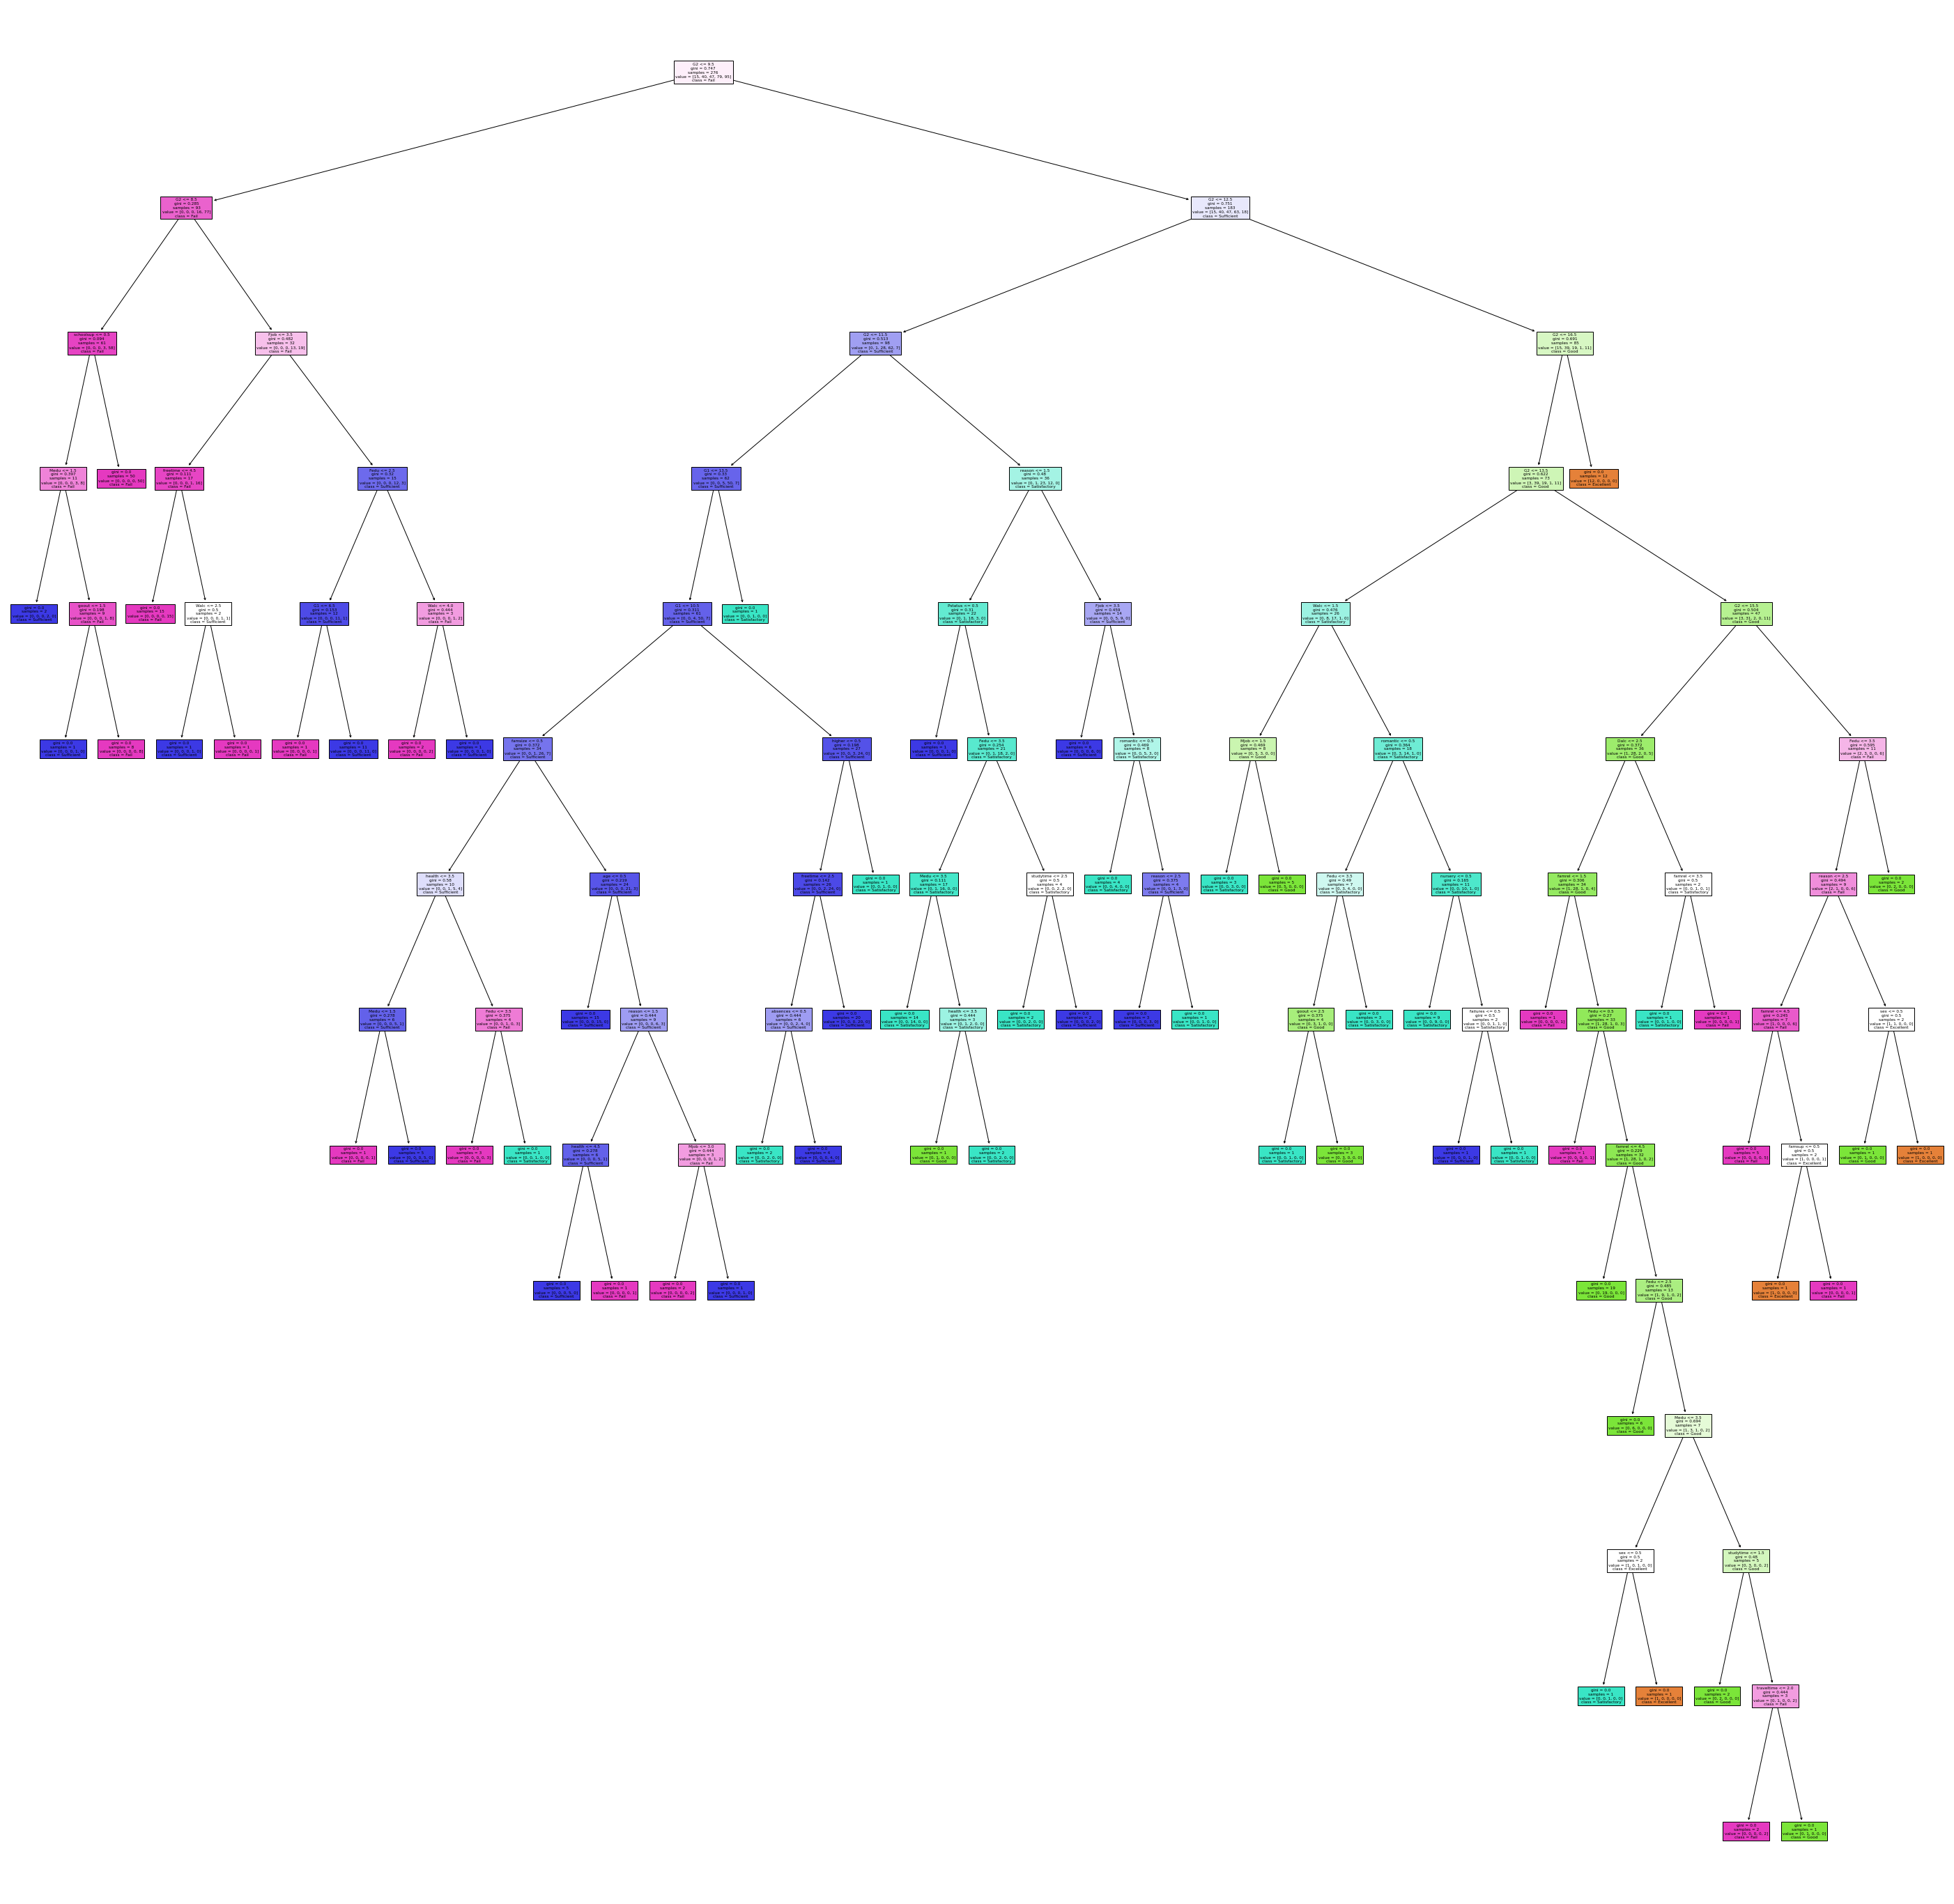

In [56]:
from sklearn import tree
plt.figure(figsize=(50,50))
dec_tree = tree.plot_tree(decision_tree=dt_model, feature_names = X.columns, 
                     class_names =["Excellent", "Good", "Satisfactory","Sufficient","Fail"] , filled = True)
plt.show()

In [57]:
# Applying Logistic Regression Here:
model = LogisticRegression(max_iter = 3000)
model_lr = model.fit(X_train,y_train)
prediction1 = model_lr.predict(X_test)

In [58]:
metrics.accuracy_score(prediction1,y_test)*100

62.18487394957983

<AxesSubplot:>

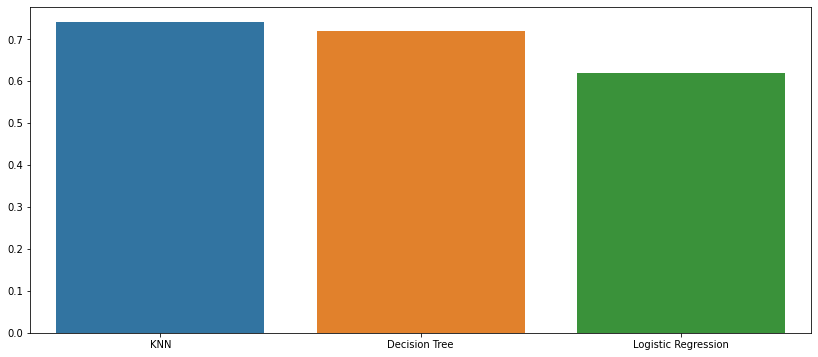

In [59]:
plt.figure(figsize=(14,6))
data={'KNN' : 0.74,'Decision Tree' : 0.72, 'Logistic Regression' : 0.62}
ML_model = pd.DataFrame(data,index =[1,2,3])
sns.barplot(data=ML_model)